# Cargar modelo

NOTA: Ejecutar al principio (solo una vez) tarda varios minutos en instalar todo.

 SI AL EJECUTAR DA FALLO DE MEMORIA HAZ CLICK EN MENU:

 "ENTORNO DE EJECUCIÓN"->"DESCONERCTARSE Y ELIMINAR ENTORNO EJECUCIÓN" y vuelve a ejecutar esta celda.


In [1]:
# import os

try:
  import accelerate
except ImportError:
  # instala paquetes
  %pip install -q accelerate bitsandbytes rich transformers

  print("instaladas librerías necesarias")


from transformers import AutoTokenizer, AutoModelForCausalLM

# Inicializa la variable model como None al inicio
model = None
tokenizer = None


# Función para cargar el modelo si aún no está cargado
def load_model():
    global model
    global tokenizer
    if model is None or not hasattr(model, 'num_parameters'):  # Verifica si model está vacío o no parece ser un modelo válido
        print("Cargando modelo...")
        # modelo sin cuantizar (se queda sin memoria con contexto grande)
        tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/deepseek-coder-6.7b-instruct", torch_dtype="auto", trust_remote_code=True)
        model = AutoModelForCausalLM.from_pretrained("deepseek-ai/deepseek-coder-6.7b-instruct", device_map='auto', torch_dtype="auto", trust_remote_code=True)
        #torch_dtype=torch.float16  (half precision) or torch.float32 (single precision que sería absurdo porque deepseek coder viene de llama 2 cuyo parámetros son float16)
        # tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/deepseek-coder-6.7b-instruct", trust_remote_code=True)
        # model = AutoModelForCausalLM.from_pretrained("deepseek-ai/deepseek-coder-6.7b-instruct", device_map='auto', load_in_8bit=True, trust_remote_code=True)
        print("Modelo cargado.")
    else:
        print("Modelo ya estaba cargado.")


load_model()

Cargando modelo...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Modelo cargado.


NOTA: EL MODELO USA AL LÍMITE LA MEMORIA, SI AL EJECUTAR POR PRIMERA VEZ DA FALLO DE MEMORIA VUELVE A EJECUTAR AMBAS CELDAS Y FUNCIONARÁ.




# integro todo en una sola celda

In [7]:
import re
from IPython.display import display, HTML


def apply_syntax_highlighting_python(line):
    # Separar comentarios del resto del código
    parts = re.split(r'(#.*$)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('#'):
            # Resaltar comentarios
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas de caracteres
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)
            part = re.sub(r'(\'.*?\')', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave
            keywords = [
                'def', 'return', 'if', 'else', 'elif', 'for', 'while', 'break', 
                'continue', 'try', 'except', 'finally', 'with', 'as', 'import', 
                'from', 'class', 'raise', 'pass', 'yield', 'assert', 'True', 
                'False', 'None', 'and', 'or', 'not', 'is', 'in', 'global', 'nonlocal'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line


def apply_syntax_highlighting_java(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'public', 'private', 'protected', 'class', 'static', 'final', 'void',
                'int', 'double', 'String', 'if', 'else', 'for', 'while', 'return', 'this'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line




def apply_syntax_highlighting_kotlin(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'val', 'var', 'fun', 'for', 'null', 'true', 'false', 'this', 'super',
                'return', 'break', 'continue', 'object', 'class', 'interface', 'typealias', 
                'if', 'else', 'while', 'do', 'when', 'try', 'catch', 'finally', 'throw'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line



def apply_syntax_highlighting_c(line):
    # Resaltar directivas #include como un caso especial
    if '#include' in line:
        # Escapar < y > en directivas #include
        line = re.sub(r'(#include\s*<.*?>)', lambda m: m.group(1).replace('<', '&lt;').replace('>', '&gt;'), line)
        # Aplicar el resaltado de sintaxis a la directiva #include
        line = re.sub(r'(#include\s*&lt;.*?&gt;)', r'<span style="color: #d14;">\1</span>', line)
    else:
        # Para el resto del código C, primero escapamos < y > para evitar conflictos con etiquetas HTML
        line = line.replace('<', '&lt;').replace('>', '&gt;')

        # Resaltar comentarios, cadenas y números
        # ... (El resto del código para resaltar comentarios, cadenas y números)

    # Resaltar palabras clave de C
    keywords = [
        'int', 'char', 'float', 'double', 'long', 'short', 'unsigned', 'signed',
        'void', 'if', 'else', 'switch', 'case', 'default', 'while', 'do', 'for', 
        'goto', 'continue', 'break', 'return', 'sizeof', 'struct', 'union', 'typedef',
        'static', 'enum', 'const', 'volatile'
        # ... (El resto de las palabras clave)
    ]
    for keyword in keywords:
        pattern = r'\b{}\b'.format(re.escape(keyword))
        replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
        line = re.sub(pattern, replacement, line)

    return line




def apply_syntax_highlighting_javascript(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'var', 'let', 'const', 'function', 'return', 'if', 'else', 'for', 'while',
                'do', 'switch', 'case', 'default', 'break', 'continue', 'true', 'false', 
                'null', 'undefined', 'try', 'catch', 'finally', 'throw', 'class', 'this', 
                'new', 'delete', 'typeof', 'in', 'instanceof', 'await', 'async', 'yield'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line




def apply_syntax_highlighting_go(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'package', 'import', 'func', 'return', 'defer', 'go', 'select', 'interface', 
                'struct', 'map', 'channel', 'type', 'var', 'const', 'if', 'else', 'switch', 
                'case', 'default', 'for', 'range', 'break', 'continue', 'fallthrough', 'goto'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line





def apply_syntax_highlighting_html(line):
    # Escapar las etiquetas HTML
    line = line.replace('<', '&lt;').replace('>', '&gt;')

    # Resaltar comentarios HTML
    line = re.sub(r'(&lt;!--.*?--&gt;)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Resaltar contenido de texto (entre etiquetas)
    line = re.sub(r'(&gt;.*?&lt;)', r'<span style="color: #d14;">\1</span>', line, flags=re.DOTALL)

    return line





def apply_syntax_highlighting(line, language):
    if language == 'python':
        return apply_syntax_highlighting_python(line)
    elif language == 'java':
        return apply_syntax_highlighting_java(line)
    elif language == 'html':
        return apply_syntax_highlighting_html(line)
    elif language == 'javascript':
        return apply_syntax_highlighting_javascript(line)
    elif language == 'go':
        return apply_syntax_highlighting_go(line)
    elif language == 'c':
        return apply_syntax_highlighting_c(line)
    elif language == 'kotlin':
        return apply_syntax_highlighting_kotlin(line)
    # ... Agregar más lenguajes si es necesario
    return line  # Estilo por defecto


def display_formatted_text(input_text):
    lines = input_text.split('\n')
    in_code_block = False
    in_instruction_block = False
    language = None
    html_output = ''
    code_block_id = 0

    for line in lines:
        if line.strip() == '### Instruction:':
            in_instruction_block = True
            html_output += '<div style="border: 1px solid #ccc; padding: 10px; margin: 10px 0; border-radius: 5px;"><b>Prompt:</b><br>'
            continue
        elif line.strip() == '### Response:':
            in_instruction_block = False
            html_output += '</div>'
            continue

        if in_instruction_block:
            html_output += line + '<br>'
            continue

        if line.strip().startswith('```'):
            if in_code_block:  # Fin de un bloque de código
                html_output += '</code></pre><button onclick="copyToClipboard(\'code-block-{}-content\')">Copiar</button></div>'.format(code_block_id)
                in_code_block = False
                language = None
                code_block_id += 1
            else:  # Inicio de un bloque de código
                in_code_block = True
                language = line.strip().split('```')[-1]  # Captura el lenguaje si está especificado
                html_output += '<div id="code-block-{}" style="position: relative; margin: 10px 0; border: 1px solid #ddd; border-radius: 5px; background-color: #f7f7f7;"><pre id="code-block-{}-content" style="margin: 0; padding: 15px; overflow: auto;"><code style="color: #333;">'.format(code_block_id, code_block_id)
        elif in_code_block:
            formatted_line = apply_syntax_highlighting(line, language)
            html_output += formatted_line + '<br>'
        else:
            # Estilo Markdown para texto normal
            html_output += '<div style="margin: 10px 0; font-family: monospace;">' + line + '</div>'

    # JavaScript para copiar al portapapeles
    html_output += '''
    <script>
    function copyToClipboard(elementId) {
        var text = document.getElementById(elementId).innerText;
        navigator.clipboard.writeText(text).then(function() {
            console.log('Texto copiado al portapapeles');
        })
        .catch(function(err) {
            console.error('Error al copiar al portapapeles', err);
        });
    }
    </script>
    '''

    display(HTML(html_output))


# @title Output Chat
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
from IPython.display import display, Image, clear_output#, Markdown
# from rich.markdown import Markdown
from IPython.display import Markdown
# import markdown

import ipywidgets as widgets


class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""
        self.in_code_block = False  # Indica si estamos dentro de un bloque de código

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Procesa el buffer para enviar el texto línea por línea
        while '\n' in self.output_buffer:
            line_end_index = self.output_buffer.find('\n')
            line = self.output_buffer[:line_end_index].strip()
            self.output_buffer = self.output_buffer[line_end_index + 1:]

            # Maneja el inicio y el fin de los bloques de código
            if line.startswith('```'):
                self.in_code_block = not self.in_code_block
                if self.in_code_block:
                    # Si estamos comenzando un bloque de código, enviamos solo el delimitador
                    with output:
                        output.append_display_data(Markdown(line))
                    continue

            # Envía la línea al widget Output
            with output:
                formatted_line = f'```{line}```' if self.in_code_block else line
                output.append_display_data(Markdown(formatted_line))

        # Si el stream está terminando, envía cualquier texto restante
        if stream_end and self.output_buffer:
            with output:
                formatted_line = f'```{self.output_buffer}```' if self.in_code_block else self.output_buffer
                output.append_display_data(Markdown(formatted_line))
            self.output_buffer = ""


historico = ""

input_text = ""


text_input = widgets.Textarea(
    value='',
    placeholder='Escribe algo aquí, por ejemplo: /help',
    description='Input:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='100px'), # Ajusta el tamaño aquí
    id='widget-textarea-id'
)


button = widgets.Button(
    description='Enviar',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' o ''
    tooltip='Enviar',
    icon='check' # (FontAwesome names sin el prefijo `fa-`)
)

def display_response(text, image_path=None):
    text = text.replace("�", "ú") #error de este modelo con las "ú"
    text = text.replace("<|EOT|>", "") #no mostrar este caracter especial
    # display(Markdown(text))  # Para texto
    display_formatted_text(text)  # Para texto con formato
    # Para imágenes (si response contiene una ruta de imagen o URL)
    # Mostrar imagen si la ruta está proporcionada
    if image_path:
        display(Image(filename=image_path))


# VENTANA DESLIZANTE
def ajustar_contexto(texto, max_longitud=8000, secuencia="### Instruction"):
    # Comprobar si la longitud del texto es mayor que el máximo permitido
    if len(texto) > max_longitud:
        indice_secuencia = 0

        while True:
            # Buscar la secuencia de ajuste
            indice_secuencia = texto.find(secuencia, indice_secuencia + 1)

            # Si la secuencia no se encuentra o el texto restante es menor que la longitud máxima
            if indice_secuencia == -1 or len(texto) - indice_secuencia <= max_longitud:
                break

        # Si encontramos una secuencia válida
        if indice_secuencia != -1:
            return texto[indice_secuencia:]
        else:
            # Si no se encuentra ninguna secuencia adecuada, tomar los últimos max_longitud caracteres
            return texto[-max_longitud:]
    else:
        return texto


def eliminar_ultima_pregunta_respuesta(texto, secuencia="### Instruction"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        return texto[:indice_secuencia]


def eliminar_ultimas_preguntas_respuestas(texto, n=1, secuencia="### Instruction"):
    for i in range(n):
        texto = eliminar_ultima_pregunta_respuesta(texto, secuencia)
    return texto

# recuperar última pregunta desde ### Instruction hasta ### Response
def recuperar_ultima_pregunta(texto, secuencia="### Instruction", fin="### Response"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)
    indice_fin = texto.rfind(fin)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        indice_secuencia += len(secuencia) + 2
        return texto[indice_secuencia:indice_fin]


def generate_long_chat(contexto, input_text, max_additional_tokens=2000):
    global historico

    prompt = f"### Instruction:\n{input_text}\n### Response:\n"
    # streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True) # para streamear el output pero sin repetir el prompt ni el contexto anterior.

    custom_streamer = CustomTextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    final_prompt = contexto + "\n" + prompt
    longitud_prompt_tokens = len(tokenizer.encode(final_prompt))

    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)

    model_inputs = inputs.to(model.device)      # .to("cuda")
    outputs = model.generate(**model_inputs,
                            streamer=custom_streamer,
                            max_new_tokens=max_additional_tokens,
                            #  max_length=max_length,
                            temperature=0.3,
                            top_k=50,
                            top_p=0.5,
                            pad_token_id = 3200,
                            eos_token_id=32021,
                            do_sample=True)


    inicio_generado = longitud_prompt_tokens - 1
    decoded_output = tokenizer.decode(outputs[0][inicio_generado:], skip_special_tokens=True)

    # decoded_output = decoded_output.replace("�", "ú") #error de este modelo con las "ú"

    historico += prompt + decoded_output

    text = final_prompt + decoded_output + "<|EOT|>\n"
    return text



load_model()

system_prompt = """
You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions related to computer science.
"""

import sys
import os
import time


contexto = system_prompt
historico = contexto


def guardar_historico(historico, nombre_fichero):
    with open(nombre_fichero, "w", encoding="utf-8") as archivo:
        archivo.write(historico)


def on_button_clicked(b):
    global contexto, historico, input_text
    # Cambiar el estilo del botón a "procesando"
    button.description = 'Procesando...'
    button.button_style = 'warning'  # Color amarillo para indicar procesamiento
    button.disabled = True

    # Acción a realizar cuando se hace clic en el botón
    try:
        with output:
            # output.clear_output()
            print(f"User: {text_input.value}")
            input_text = text_input.value
            text_input.value = ""
            # input_text = input("user: ")
            if input_text == "/new":
                guardar_historico(historico, "last_session.txt")
                historico = ""
                contexto = system_prompt
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/historico":
                clear_output(wait=True)
                display_response(historico)
            elif input_text == "/contexto":
                clear_output(wait=True)
                display_response(contexto)
            elif input_text.startswith("/save"):
                partes = input_text.split(maxsplit=1)
                nombre_fichero = partes[1] if len(partes) > 1 else time.strftime("%Y-%m-%d_%H-%M") + ".txt"
                guardar_historico(historico, nombre_fichero)
                display_response(f"Histórico guardado en '{nombre_fichero}'")
            elif input_text == "/len":
                display_response("longitud del contexto en caracteres: " + str(len(contexto)))
            elif input_text.startswith("/del"):
                partes = input_text.split()
                if len(partes) == 2 and partes[1].isdigit():
                    try:
                        n = int(partes[1])
                    except ValueError:
                        n = 1
                else:
                    n = 1  # Por defecto, eliminar una respuesta
                historico+= f"\n#############################\n/del {n}\n##########################################\n"
                contexto = eliminar_ultimas_preguntas_respuestas(contexto, n)
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/repeat":
                historico+= "\n#############################\n/repeat\n##########################################\n"
                ultima_pregunta = recuperar_ultima_pregunta(contexto)
                contexto = eliminar_ultima_pregunta_respuesta(contexto)
                # imprimir ultimas 10 letras del contexto:
                print("GENERANDO STREAMING... (AUN SIN FORMATO)")
                contexto = generate_long_chat(contexto, input_text=ultima_pregunta, max_additional_tokens=2048)
                contexto = ajustar_contexto(contexto)                
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/help" or input_text == "/?":
                print("""
                /new: Nuevo Chat
                /historico: mostrar el historico completo (no solo el alcance del contexto)
                /contexto: muestra el contexto de la conversación (la zona delimitada que tendrá en cuenta el modelo)
                /save [file_name]: guarda el historico conversacional en un fichero.
                /len: mostrar la longitud del contexto
                /del [n]: eliminar las últimas n respuestas
                /repeat: repetir la última respuesta
                /clear: borrar el contexto
                """)
            elif input_text == "/clear":
                historico+= "\n#############################\n/clear\n##########################################\n"
                contexto = system_prompt
                clear_output(wait=True)
                display_response(contexto)
            else:
            # generate response
                print("GENERANDO STREAMING... (AUN SIN FORMATO)")
                contexto = generate_long_chat(contexto, input_text=input_text, max_additional_tokens=2048)
                contexto = ajustar_contexto(contexto)
                clear_output(wait=True)
                display_response(contexto)
    finally:
        # Cambiar el estilo del botón de vuelta a su estado normal
        button.description = 'Enviar'
        button.button_style = 'success'  # Color verde para indicar listo
        button.disabled = False

# Crear un output para mostrar los resultados
output = widgets.Output()

# Asignar la función de callback al evento de clic del botón
button.on_click(on_button_clicked)

# Mostrar el output
display(output)


import ipywidgets as widgets
from IPython.display import display

display(widgets.HBox([text_input, button]))

Modelo ya estaba cargado.


Output()

# Widgets

In [ ]:
import re
from IPython.display import display, HTML


def apply_syntax_highlighting_python(line):
    # Separar comentarios del resto del código
    parts = re.split(r'(#.*$)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('#'):
            # Resaltar comentarios
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas de caracteres
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)
            part = re.sub(r'(\'.*?\')', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave
            keywords = [
                'def', 'return', 'if', 'else', 'elif', 'for', 'while', 'break', 
                'continue', 'try', 'except', 'finally', 'with', 'as', 'import', 
                'from', 'class', 'raise', 'pass', 'yield', 'assert', 'True', 
                'False', 'None', 'and', 'or', 'not', 'is', 'in', 'global', 'nonlocal'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line


def apply_syntax_highlighting_java(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'public', 'private', 'protected', 'class', 'static', 'final', 'void',
                'int', 'double', 'String', 'if', 'else', 'for', 'while', 'return', 'this'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line




def apply_syntax_highlighting_kotlin(line):
    # Resaltar comentarios de múltiples líneas
    if '/*' in line or '*/' in line:
        line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Separar comentarios de una línea del resto del código
    parts = re.split(r'(//.*)', line, maxsplit=1)
    highlighted_line = ''

    for part in parts:
        if part.startswith('//'):
            # Resaltar comentarios de una línea
            highlighted_line += f'<span style="color: #60a0b0;">{part}</span>'
        else:
            # Resaltar cadenas
            part = re.sub(r'(\".*?\")', r'<span style="color: #2a00ff;">\1</span>', part)

            # Resaltar números
            part = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', part)

            # Resaltar palabras clave de Java
            keywords = [
                'val', 'var', 'fun', 'for', 'null', 'true', 'false', 'this', 'super',
                'return', 'break', 'continue', 'object', 'class', 'interface', 'typealias', 
                'if', 'else', 'while', 'do', 'when', 'try', 'catch', 'finally', 'throw'
            ]
            for keyword in keywords:
                pattern = r'\b{}\b'.format(re.escape(keyword))
                replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
                part = re.sub(pattern, replacement, part)

            highlighted_line += part

    return highlighted_line




def apply_syntax_highlighting_c(line):
    # Resaltar directivas #include como un caso especial
    if '#include' in line:
        # Escapar < y > en directivas #include
        line = re.sub(r'(#include\s*<.*?>)', lambda m: m.group(1).replace('<', '&lt;').replace('>', '&gt;'), line)
        # Aplicar el resaltado de sintaxis a la directiva #include
        line = re.sub(r'(#include\s*&lt;.*?&gt;)', r'<span style="color: #d14;">\1</span>', line)
    else:
        # Para el resto del código C, primero escapamos < y > para evitar conflictos con etiquetas HTML
        line = line.replace('<', '&lt;').replace('>', '&gt;')

        # Resaltar comentarios, cadenas y números
        # ... (El resto del código para resaltar comentarios, cadenas y números)

    # Resaltar palabras clave de C
    keywords = [
        'int', 'char', 'float', 'double', 'long', 'short', 'unsigned', 'signed',
        'void', 'if', 'else', 'switch', 'case', 'default', 'while', 'do', 'for', 
        'goto', 'continue', 'break', 'return', 'sizeof', 'struct', 'union', 'typedef',
        'static', 'enum', 'const', 'volatile'
        # ... (El resto de las palabras clave)
    ]
    for keyword in keywords:
        pattern = r'\b{}\b'.format(re.escape(keyword))
        replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
        line = re.sub(pattern, replacement, line)

    return line




def apply_syntax_highlighting_javascript(line):
    # Resaltar comentarios
    line = re.sub(r'(//.*$)', r'<span style="color: #60a0b0;">\1</span>', line)
    line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Resaltar cadenas
    line = re.sub(r'(\".*?\")|(\'.*?\')', r'<span style="color: #2a00ff;">\1</span>', line)

    # Resaltar números
    line = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', line)

    # Resaltar palabras clave de JavaScript
    keywords = [
        'var', 'let', 'const', 'function', 'return', 'if', 'else', 'for', 'while',
        'do', 'switch', 'case', 'default', 'break', 'continue', 'true', 'false', 
        'null', 'undefined', 'try', 'catch', 'finally', 'throw', 'class', 'this', 
        'new', 'delete', 'typeof', 'in', 'instanceof', 'await', 'async', 'yield'
    ]
    for keyword in keywords:
        pattern = r'\b{}\b'.format(re.escape(keyword))
        replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
        line = re.sub(pattern, replacement, line)

    return line


def apply_syntax_highlighting_go(line):
    # Resaltar comentarios
    line = re.sub(r'(//.*$)', r'<span style="color: #60a0b0;">\1</span>', line)
    line = re.sub(r'(/\*.*?\*/)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Resaltar cadenas
    line = re.sub(r'(\".*?\")|(\'.*?\')|(`.*?`)', r'<span style="color: #2a00ff;">\1</span>', line)

    # Resaltar números
    line = re.sub(r'\b(\d+\.?\d*)\b', r'<span style="color: #008000;">\1</span>', line)

    # Resaltar palabras clave de Go
    keywords = [
        'package', 'import', 'func', 'return', 'defer', 'go', 'select', 'interface', 
        'struct', 'map', 'channel', 'type', 'var', 'const', 'if', 'else', 'switch', 
        'case', 'default', 'for', 'range', 'break', 'continue', 'fallthrough', 'goto'
    ]
    for keyword in keywords:
        pattern = r'\b{}\b'.format(re.escape(keyword))
        replacement = r'<span style="color: #d14;">{}</span>'.format(keyword)
        line = re.sub(pattern, replacement, line)

    return line



def apply_syntax_highlighting_html(line):
    # Escapar las etiquetas HTML
    line = line.replace('<', '&lt;').replace('>', '&gt;')

    # Resaltar comentarios HTML
    line = re.sub(r'(&lt;!--.*?--&gt;)', r'<span style="color: #60a0b0;">\1</span>', line, flags=re.DOTALL)

    # Resaltar contenido de texto (entre etiquetas)
    line = re.sub(r'(&gt;.*?&lt;)', r'<span style="color: #d14;">\1</span>', line, flags=re.DOTALL)

    return line





def apply_syntax_highlighting(line, language):
    if language == 'python':
        return apply_syntax_highlighting_python(line)
    elif language == 'java':
        return apply_syntax_highlighting_java(line)
    elif language == 'html':
        return apply_syntax_highlighting_html(line)
    elif language == 'javascript':
        return apply_syntax_highlighting_javascript(line)
    elif language == 'go':
        return apply_syntax_highlighting_go(line)
    elif language == 'c':
        return apply_syntax_highlighting_c(line)
    elif language == 'kotlin':
        return apply_syntax_highlighting_kotlin(line)
    # ... Agregar más lenguajes si es necesario
    return line  # Estilo por defecto




def display_formatted_text(input_text):
    lines = input_text.split('\n')
    in_code_block = False
    language = None
    html_output = ''
    code_block_id = 0

    for line in lines:
        if line.strip().startswith('```'):
            if in_code_block:  # Fin de un bloque de código
                html_output += '</code></pre><button onclick="copyToClipboard(\'code-block-{}-content\')">Copiar</button></div>'.format(code_block_id)
                in_code_block = False
                language = None
                code_block_id += 1
            else:  # Inicio de un bloque de código
                in_code_block = True
                language = line.strip().split('```')[-1]  # Captura el lenguaje si está especificado
                html_output += '<div id="code-block-{}" style="position: relative; margin: 10px 0; border: 1px solid #ddd; border-radius: 5px; background-color: #f7f7f7;"><pre id="code-block-{}-content" style="margin: 0; padding: 15px; overflow: auto;"><code style="color: #333;">'.format(code_block_id, code_block_id)
        else:
            if in_code_block:
                formatted_line = apply_syntax_highlighting(line, language)
                html_output += formatted_line + '<br>'
            else:
                # html_output += '<p>' + line + '</p>'
                # estilo mas cercano a markdonw para el texto normal
                html_output += '<div style="margin: 10px 0; font-family: monospace;">' + line + '</div>'


    # JavaScript para copiar al portapapeles
    html_output += '''
    <script>
    function copyToClipboard(elementId) {
        var text = document.getElementById(elementId).innerText;
        navigator.clipboard.writeText(text).then(function() {
            console.log('Texto copiado al portapapeles');
        })
        .catch(function(err) {
            console.error('Error al copiar al portapapeles', err);
        });
    }
    </script>
    '''

    display(HTML(html_output))

# Ejemplo de uso
text = """
Esto es un texto normal.
```python
# Esto es un bloque de código
def funcion():
  print("Hola Mundo", 5, "neuronas") #codigo alfa
```
Y esto es más texto normal.

```java
// Esto es un bloque de código Java
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
```
texto normal

```html
<!-- Esto es un bloque de código HTML -->
<html>
    <head>
        <title>Mi página web</title>
    </head>
    <body>
        <h1>Hola Mundo</h1>
        <p>Esto es un párrafo en HTML.</p>
    </body>
</html>
```
"""

display_formatted_text(text)

In [12]:
# @title Output Chat
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
from IPython.display import display, Image, clear_output#, Markdown
# from rich.markdown import Markdown
from IPython.display import Markdown
# import markdown

import ipywidgets as widgets


class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""
        self.in_code_block = False  # Indica si estamos dentro de un bloque de código

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Procesa el buffer para enviar el texto línea por línea
        while '\n' in self.output_buffer:
            line_end_index = self.output_buffer.find('\n')
            line = self.output_buffer[:line_end_index].strip()
            self.output_buffer = self.output_buffer[line_end_index + 1:]

            # Maneja el inicio y el fin de los bloques de código
            if line.startswith('```'):
                self.in_code_block = not self.in_code_block
                if self.in_code_block:
                    # Si estamos comenzando un bloque de código, enviamos solo el delimitador
                    with output:
                        output.append_display_data(Markdown(line))
                    continue

            # Envía la línea al widget Output
            with output:
                formatted_line = f'```{line}```' if self.in_code_block else line
                output.append_display_data(Markdown(formatted_line))

        # Si el stream está terminando, envía cualquier texto restante
        if stream_end and self.output_buffer:
            with output:
                formatted_line = f'```{self.output_buffer}```' if self.in_code_block else self.output_buffer
                output.append_display_data(Markdown(formatted_line))
            self.output_buffer = ""


historico = ""

input_text = ""


text_input = widgets.Textarea(
    value='',
    placeholder='Escribe algo aquí, por ejemplo: /help',
    description='Input:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='100px') # Ajusta el tamaño aquí
)


button = widgets.Button(
    description='Enviar',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' o ''
    tooltip='Enviar',
    icon='check' # (FontAwesome names sin el prefijo `fa-`)
)
# def on_button_clicked(b):
#     print(f"Contenido del texto:\n{text_input.value}")
#     input_text = text_input.value
#     text_input.value = ''
#     # envio = True

# button.on_click(on_button_clicked)


def display_response(text, image_path=None):
    text = text.replace("�", "ú") #error de este modelo con las "ú"
    text = text.replace("<|EOT|>", "") #no mostrar este caracter especial
    # display(Markdown(text))  # Para texto
    display_formatted_text(text)  # Para texto con formato
    # Para imágenes (si response contiene una ruta de imagen o URL)
    # Mostrar imagen si la ruta está proporcionada
    if image_path:
        display(Image(filename=image_path))


# VENTANA DESLIZANTE
def ajustar_contexto(texto, max_longitud=4000, secuencia="### Instruction"):
    # Comprobar si la longitud del texto es mayor que el máximo permitido
    if len(texto) > max_longitud:
        indice_secuencia = 0

        while True:
            # Buscar la secuencia de ajuste
            indice_secuencia = texto.find(secuencia, indice_secuencia + 1)

            # Si la secuencia no se encuentra o el texto restante es menor que la longitud máxima
            if indice_secuencia == -1 or len(texto) - indice_secuencia <= max_longitud:
                break

        # Si encontramos una secuencia válida
        if indice_secuencia != -1:
            return texto[indice_secuencia:]
        else:
            # Si no se encuentra ninguna secuencia adecuada, tomar los últimos max_longitud caracteres
            return texto[-max_longitud:]
    else:
        return texto


def eliminar_ultima_pregunta_respuesta(texto, secuencia="### Instruction"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        return texto[:indice_secuencia]


def eliminar_ultimas_preguntas_respuestas(texto, n=1, secuencia="### Instruction"):
    for i in range(n):
        texto = eliminar_ultima_pregunta_respuesta(texto, secuencia)
    return texto

# recuperar última pregunta desde ### Instruction hasta ### Response
def recuperar_ultima_pregunta(texto, secuencia="### Instruction", fin="### Response"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)
    indice_fin = texto.rfind(fin)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        indice_secuencia += len(secuencia) + 2
        return texto[indice_secuencia:indice_fin]


# def eliminar_ultima_respuesta(texto, secuencia="### Response"):
#     # Buscar la secuencia de ajuste
#     indice_secuencia = texto.rfind(secuencia)

#     # Si la secuencia no se encuentra
#     if indice_secuencia == -1:
#         return texto
#     else:
#         return texto[:indice_secuencia]


def generate_long_chat(contexto, input_text, max_additional_tokens=2000):
    global historico

    prompt = f"### Instruction:\n{input_text}\n### Response:\n"
    # streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True) # para streamear el output pero sin repetir el prompt ni el contexto anterior.

    custom_streamer = CustomTextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    final_prompt = contexto + "\n" + prompt
    longitud_prompt_tokens = len(tokenizer.encode(final_prompt))

    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)

    model_inputs = inputs.to(model.device)      # .to("cuda")
    outputs = model.generate(**model_inputs,
                            streamer=custom_streamer,
                            max_new_tokens=max_additional_tokens,
                            #  max_length=max_length,
                            temperature=0.3,
                            top_k=50,
                            top_p=0.5,
                            pad_token_id = 3200,
                            eos_token_id=32021,
                            do_sample=True)


    inicio_generado = longitud_prompt_tokens - 1
    decoded_output = tokenizer.decode(outputs[0][inicio_generado:], skip_special_tokens=True)

    # decoded_output = decoded_output.replace("�", "ú") #error de este modelo con las "ú"

    historico += prompt + decoded_output

    text = final_prompt + decoded_output + "<|EOT|>\n"
    return text



load_model()

system_prompt = """
You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions related to computer science.
"""

import sys
import os
import time


contexto = system_prompt
historico = contexto


def guardar_historico(historico, nombre_fichero):
    with open(nombre_fichero, "w", encoding="utf-8") as archivo:
        archivo.write(historico)


def on_button_clicked(b):
    global contexto, historico, input_text
    # Cambiar el estilo del botón a "procesando"
    button.description = 'Procesando...'
    button.button_style = 'warning'  # Color amarillo para indicar procesamiento
    button.disabled = True

    # Acción a realizar cuando se hace clic en el botón
    try:
        with output:
            # output.clear_output()
            print(f"User: {text_input.value}")
            input_text = text_input.value
            text_input.value = ""
            # input_text = input("user: ")
            if input_text == "/new":
                guardar_historico(historico, "last_session.txt")
                historico = ""
                contexto = system_prompt
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/historico":
                clear_output(wait=True)
                display_response(historico)
            elif input_text == "/contexto":
                clear_output(wait=True)
                display_response(contexto)
            elif input_text.startswith("/save"):
                partes = input_text.split(maxsplit=1)
                nombre_fichero = partes[1] if len(partes) > 1 else time.strftime("%Y-%m-%d_%H-%M") + ".txt"
                guardar_historico(historico, nombre_fichero)
                display_response(f"Histórico guardado en '{nombre_fichero}'")
            elif input_text == "/len":
                display_response("longitud del contexto en caracteres: " + str(len(contexto)))
            elif input_text.startswith("/del"):
                partes = input_text.split()
                if len(partes) == 2 and partes[1].isdigit():
                    try:
                        n = int(partes[1])
                    except ValueError:
                        n = 1
                else:
                    n = 1  # Por defecto, eliminar una respuesta
                historico+= f"\n#############################\n/del {n}\n##########################################\n"
                contexto = eliminar_ultimas_preguntas_respuestas(contexto, n)
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/repeat":
                historico+= "\n#############################\n/repeat\n##########################################\n"
                ultima_pregunta = recuperar_ultima_pregunta(contexto)
                contexto = eliminar_ultima_pregunta_respuesta(contexto)
                # imprimir ultimas 10 letras del contexto:
                print("GENERANDO STREAMING... (AUN SIN FORMATO)")
                contexto = generate_long_chat(contexto, input_text=ultima_pregunta, max_additional_tokens=2048)
                contexto = ajustar_contexto(contexto)                
                clear_output(wait=True)
                display_response(contexto)
            elif input_text == "/help" or input_text == "/?":
                print("""
                /new: Nuevo Chat
                /historico: mostrar el historico completo (no solo el alcance del contexto)
                /contexto: muestra el contexto de la conversación (la zona delimitada que tendrá en cuenta el modelo)
                /save [file_name]: guarda el historico conversacional en un fichero.
                /len: mostrar la longitud del contexto
                /del [n]: eliminar las últimas n respuestas
                /repeat: repetir la última respuesta
                /clear: borrar el contexto
                """)
            elif input_text == "/clear":
                historico+= "\n#############################\n/clear\n##########################################\n"
                contexto = system_prompt
                clear_output(wait=True)
                display_response(contexto)
            else:
            # generate response
                print("GENERANDO STREAMING... (AUN SIN FORMATO)")
                contexto = generate_long_chat(contexto, input_text=input_text, max_additional_tokens=2048)
                contexto = ajustar_contexto(contexto)
                clear_output(wait=True)
                display_response(contexto)
    finally:
        # Cambiar el estilo del botón de vuelta a su estado normal
        button.description = 'Enviar'
        button.button_style = 'success'  # Color verde para indicar listo
        button.disabled = False

# Crear un output para mostrar los resultados
output = widgets.Output()

# Asignar la función de callback al evento de clic del botón
button.on_click(on_button_clicked)

# Mostrar el output
display(output)


Modelo ya estaba cargado.


Output()

In [14]:
# @title Input Chat
import ipywidgets as widgets
from IPython.display import display

display(widgets.HBox([text_input, button]))

In [17]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
from IPython.display import display, HTML

# Tu código como un string
code = """
def funcion():
    # Código de la función
"""

# Resaltado de sintaxis usando Pygments
formatted_code = highlight(code, PythonLexer(), HtmlFormatter())

# Mostrar el resultado con resaltado de sintaxis
display(HTML(formatted_code))


In [33]:
print(contexto[-500:])

Mundo" en C:

```c
#include <stdio.h>

int main() {
    printf("Hola Mundo\n");
    return 0;
}
```

Este código simplemente imprime la cadena "Hola Mundo" en la consola. La función `printf` es una función de la biblioteca estándar de C que imprime su argumento a la salida estándar. En este caso, la cadena "Hola Mundo\n" es el argumento que se imprime. "\n" es un carácter de nueva línea, que hace que el cursor de la consola vaya a la siguiente línea después de imprimir la cadena.
<|EOT|><|EOT|>



# Apliacación de escritorio ejecutando en sistema operativo local
Tkinter es bastante básico en términos de capacidades y apariencia de la GUI. Si necesitas una interfaz más sofisticada o características avanzadas, considera usar PyQt o PyGTK.

Para ejecutar
------------- 
```bash
python programita.py
```
Aplicación de ejemplo
----------------------------
programita.py
----------------------------
```python
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox

def on_button_clicked():
    input_text = text_input.get("1.0", tk.END).strip()
    if input_text:
        # Aquí debes añadir la lógica para procesar el input_text
        # Por ejemplo, llamar a tu modelo de IA o cualquier otro procesamiento
        response = f"Tu ingresaste: {input_text}"
        text_output.insert(tk.END, response + "\n")
        text_input.delete("1.0", tk.END)
    else:
        messagebox.showinfo("Información", "Por favor, introduce algún texto.")

app = tk.Tk()
app.title("El libro de Paz")

text_input = scrolledtext.ScrolledText(app, width=80, height=10)
text_input.pack()

send_button = tk.Button(app, text="Enviar", command=on_button_clicked)
send_button.pack()

text_output = scrolledtext.ScrolledText(app, width=80, height=10)
text_output.pack()

app.mainloop()
```

# DeepSeek Coder Chat (sin widget).
NOTA: si no saliera el prompt USER: (vuelve a ejecutar la celda que funcionará)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
from IPython.display import display, Image, clear_output#, Markdown
from rich.markdown import Markdown

historico = ""

def display_response(text, image_path=None):
    text = text.replace("�", "ú") #error de este modelo con las "ú"
    text = text.replace("<|EOT|>", "") #no mostrar este caracter especial
    display(Markdown(text))  # Para texto
    # Para imágenes (si response contiene una ruta de imagen o URL)
    # Mostrar imagen si la ruta está proporcionada
    if image_path:
        display(Image(filename=image_path))


# VENTANA DESLIZANTE
def ajustar_contexto(texto, max_longitud=4000, secuencia="### Instruction"):
    # Comprobar si la longitud del texto es mayor que el máximo permitido
    if len(texto) > max_longitud:
        indice_secuencia = 0

        while True:
            # Buscar la secuencia de ajuste
            indice_secuencia = texto.find(secuencia, indice_secuencia + 1)

            # Si la secuencia no se encuentra o el texto restante es menor que la longitud máxima
            if indice_secuencia == -1 or len(texto) - indice_secuencia <= max_longitud:
                break

        # Si encontramos una secuencia válida
        if indice_secuencia != -1:
            return texto[indice_secuencia:]
        else:
            # Si no se encuentra ninguna secuencia adecuada, tomar los últimos max_longitud caracteres
            return texto[-max_longitud:]
    else:
        return texto


def eliminar_ultima_respuesta(texto, secuencia="### Instruction"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        return texto[:indice_secuencia]


def eliminar_ultimas_respuestas(texto, n=1, secuencia="### Instruction"):
    for i in range(n):
        texto = eliminar_ultima_respuesta(texto, secuencia)
    return texto


def generate_long_chat(contexto, input_text, max_additional_tokens=2000):
    global historico

    prompt = f"### Instruction:\n{input_text}\n### Response:\n"
    streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True) # para streamear el output pero sin repetir el prompt ni el contexto anterior.

    final_prompt = contexto + "\n" + prompt
    longitud_prompt_tokens = len(tokenizer.encode(final_prompt))

    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)

    model_inputs = inputs.to(model.device)      # .to("cuda")
    outputs = model.generate(**model_inputs,
                             streamer=streamer,
                             max_new_tokens=max_additional_tokens,
                            #  max_length=max_length,
                            #  temperature=0.1,
                             pad_token_id = 3200,
                             eos_token_id=32021,
                             do_sample=False)

    inicio_generado = longitud_prompt_tokens - 1
    decoded_output = tokenizer.decode(outputs[0][inicio_generado:], skip_special_tokens=True)

    # decoded_output = decoded_output.replace("�", "ú") #error de este modelo con las "ú"

    historico += prompt + decoded_output

    text = final_prompt + decoded_output + "<|EOT|>"
    return text



load_model()

system_prompt = """
You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions related to computer science.
"""

import sys
import os


contexto = system_prompt
historico = contexto

while True:
    # read input
    input_text = input("user: ")
    if input_text == "/exit": break
    if input_text == "/historico":
        # print(contexto)
        clear_output(wait=True)
        display_response(historico)
        continue
    if input_text == "/len":
        display_response("longitud del contexto en caracteres: " + len(contexto))
        continue
    if input_text.startswith("/del"):
        partes = input_text.split()
        if len(partes) == 2 and partes[1].isdigit():
            try:
                n = int(partes[1])
            except ValueError:
                n = 1
        else:
            n = 1  # Por defecto, eliminar una respuesta
        historico+= f"\n#############################\n/del {n}\n##########################################\n"
        contexto = eliminar_ultimas_respuestas(contexto, n)
        clear_output(wait=True)
        display_response(contexto)
        continue
    if input_text == "/help" or input_text == "/?":
        print("""
        /exit: salir
        /historico: mostrar el historico completo (no solo el alcance del contexto)
        /len: mostrar la longitud del contexto
        /del [n]: eliminar las últimas n respuestas
        /clear: borrar el contexto
        """)
        continue
    if input_text == "/clear":
        historico+= "\n#############################\n/clear\n##########################################\n"
        contexto = system_prompt
        clear_output(wait=True)
        display_response(contexto)
        continue
    # generate response
    contexto = generate_long_chat(contexto, input_text=input_text, max_additional_tokens=2048)
    contexto = ajustar_contexto(contexto)
    clear_output(wait=True)
    display_response(contexto)

    # print response
    # print(salida)
    # print(f"\n################################################\n")

You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions      
related to computer science.                                                                                       

                                                   Instruction:                                                    

podrías proporcionarme un ejemplo práctico en donde sea conveniente el uso de una estructura de datos con función  
hash (para el rápido acceso). Y  resolverme el ejemplo en python.                                                  

                                                     Response:                                                     

Una estructura de datos con función hash que es muy útil es el diccionario (o hash map) en Python. Este tipo de    
estructura permite almacenar pares clave-valor y permite acceder a los valores de manera rápida y eficiente.       

Aquí un ejemplo práctico:                                                                                          

                                                                                                                   
 # Creamos un diccionario                                                                                          
 hash_map = {}                                                                                                     
                                                                                                                   
 # Agregamos elementos al diccionario                                                                              
 hash_map['apple'] = 1                                                                                             
 hash_map['banana'] = 2                                                                                            
 hash_map['cherry'] = 3                                                                                            
                                                                                                                   
 # Imprimimos el diccionario                                                                                       
 print(hash_map)                                                                                                   
                                                                                                                   
 # Accedemos a los elementos del diccionario                                                                       
 print(hash_map['apple'])  # Imprime: 1                                                                            
 print(hash_map['banana'])  # Imprime: 2                                                                           
 print(hash_map['cherry'])  # Imprime: 3                                                                           
                                                                                                                   
 # Modificamos un valor del diccionario                                                                            
 hash_map['apple'] = 10                                                                                            
                                                                                                                   
 # Imprimimos el diccionario                                                                                       
 print(hash_map)                                                                                                   
                                                                                                                   
 # Eliminamos un elemento del diccionario                                                                          
 del hash_map['cherry']                                                                                            
                                                  

user: /exit


# Clases derivadas de TextStreamer

In [ ]:
class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""
        self.in_code_block = False  # Indica si estamos dentro de un bloque de código

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Procesa el buffer para enviar el texto línea por línea
        while '\n' in self.output_buffer:
            line_end_index = self.output_buffer.find('\n')
            line = self.output_buffer[:line_end_index].strip()
            self.output_buffer = self.output_buffer[line_end_index + 1:]

            # Maneja el inicio y el fin de los bloques de código
            if line.startswith('```'):
                self.in_code_block = not self.in_code_block
                if self.in_code_block:
                    # Si estamos comenzando un bloque de código, enviamos solo el delimitador
                    with output:
                        output.append_display_data(Markdown(line))
                    continue

            # Envía la línea al widget Output
            with output:
                formatted_line = f'```{line}```' if self.in_code_block else line
                output.append_display_data(Markdown(formatted_line))

        # Si el stream está terminando, envía cualquier texto restante
        if stream_end and self.output_buffer:
            with output:
                formatted_line = f'```{self.output_buffer}```' if self.in_code_block else self.output_buffer
                output.append_display_data(Markdown(formatted_line))
            self.output_buffer = ""

In [ ]:
from transformers import TextStreamer

class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Verifica si hay un salto de línea en el buffer y lo elimina
        while '\n' in self.output_buffer:
            newline_index = self.output_buffer.find('\n')
            text_to_output = self.output_buffer[:newline_index]  # Texto hasta el salto de línea
            self.output_buffer = self.output_buffer[newline_index + 1:]  # Resto del texto

            with output:
                output.append_display_data(Markdown(text_to_output))

        # Si el stream está terminando, envía cualquier texto restante
        if stream_end and self.output_buffer:
            with output:
                output.append_display_data(Markdown(self.output_buffer))
            self.output_buffer = ""

In [ ]:
class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""
        self.in_code_block = False  # Indica si estamos dentro de un bloque de código

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Verifica si estamos empezando o terminando un bloque de código
        if '```python' in self.output_buffer:
            self.in_code_block = True
        if '```' in self.output_buffer and self.output_buffer.count('```') % 2 == 0:
            self.in_code_block = False

        # Si hay un salto de línea fuera de un bloque de código o si el stream está terminando
        if '\n' in self.output_buffer and not self.in_code_block or stream_end:
            text_to_output = self.output_buffer
            self.output_buffer = ""

            with output:
                output.append_display_data(Markdown(text_to_output))

        # Si estamos dentro de un bloque de código, esperamos hasta que termine
        elif self.in_code_block:
            pass  # No hacer nada, seguir acumulando el texto

In [ ]:
from transformers import TextStreamer
class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto en lugar de imprimirlo directamente
        self.output_buffer += text

        # Si el stream está terminando o se ha acumulado suficiente texto, lo enviamos al widget Output
        if stream_end or len(self.output_buffer.split()) >= 20:  # Ejemplo: 10 palabras
            with output:
                output.append_display_data(Markdown(self.output_buffer))
            self.output_buffer = ""

In [ ]:
class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Verifica si hay un salto de línea en el buffer
        if '\n' in self.output_buffer or stream_end:
            # Encuentra el índice del primer salto de línea
            newline_index = self.output_buffer.find('\n')

            # Si hay un salto de línea, envía el texto hasta ese punto al widget Output
            if newline_index != -1:
                text_to_output = self.output_buffer[:newline_index]
                self.output_buffer = self.output_buffer[newline_index + 1:]
            else:
                text_to_output = self.output_buffer
                self.output_buffer = ""

            with output:
                output.append_display_data(Markdown(text_to_output))


In [ ]:
class CustomTextStreamer(TextStreamer):
    def __init__(self, tokenizer: "AutoTokenizer", skip_prompt: bool = False, **decode_kwargs):
        super().__init__(tokenizer, skip_prompt, **decode_kwargs)
        self.output_buffer = ""

    def on_finalized_text(self, text: str, stream_end: bool = False):
        # Acumula el texto
        self.output_buffer += text

        # Verifica si hay un salto de línea en el buffer y lo elimina
        while '\n' in self.output_buffer:
            newline_index = self.output_buffer.find('\n')
            text_to_output = self.output_buffer[:newline_index]  # Texto hasta el salto de línea
            self.output_buffer = self.output_buffer[newline_index + 1:]  # Resto del texto

            with output:
                output.append_display_data(Markdown(text_to_output))

        # Si el stream está terminando, envía cualquier texto restante
        if stream_end and self.output_buffer:
            with output:
                output.append_display_data(Markdown(self.output_buffer))
            self.output_buffer = ""

# Probaturas

In [42]:
thread_running = False

In [4]:
%pip install transformers-stream-generator

  Preparing metadata (setup.py) ... done
  Created wheel for transformers-stream-generator: filename=transformers_stream_generator-0.0.4-py3-none-any.whl size=12315 sha256=13967ed8bae4d3870ff88857590f00aef663bb7e5a772459fc6988ad3066ec03
  Stored in directory: /root/.cache/pip/wheels/47/1d/3c/92d88493ed40c0d9be60a391eb76c9a56e9f9b7542cb789401
Successfully built transformers-stream-generator


In [10]:
from transformers_stream_generator import init_stream_support
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

init_stream_support()

model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = model.eval()
prompt_text = "hello? How can I help you?\n"
input_ids = tokenizer(
    prompt_text, return_tensors="pt", add_special_tokens=False
).input_ids

with torch.no_grad():
    result = model.generate(
        input_ids,
        max_new_tokens=20,
        do_sample=True,
        top_k=30,
        top_p=0.85,
        temperature=0.35,
        repetition_penalty=1.2,
        early_stopping=True,
        seed=0,
    )
    print("the original generate output:\n###\n")
    print(tokenizer.decode(result[0], skip_special_tokens=True))
    print("###\n")
    generator = model.generate(
        input_ids,
        max_new_tokens=20,
        do_sample=True,
        top_k=30,
        top_p=0.85,
        temperature=0.35,
        repetition_penalty=1.2,
        early_stopping=True,
        seed=0,
        do_stream=True,
    )
    stream_result = ""
    print("real-time stream chunk  generate output:\n###\n")
    words = ""
    last_tokens = []
    last_decoded_tokens = []

    for index, x in enumerate(generator):
        tokens = x.cpu().numpy().tolist()
        tokens = last_tokens + tokens
        word = tokenizer.decode(tokens, skip_special_tokens=True)
        if "�" in word:
            last_tokens = tokens
        else:
            if " " in tokenizer.decode(
                last_decoded_tokens + tokens, skip_special_tokens=True
            ):
                word = " " + word
            last_tokens = []
            last_decoded_tokens = tokens

        stream_result += word
        print(f"chunk index: {index}: {word}")
    print("###\n")
    print("the stream cumulate generate output:\n###\n")
    print(stream_result)
    print("###\n")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the original generate output:
###

hello? How can I help you?
The following are some of the most common questions that come up when a user asks for assistance with their
###

real-time stream chunk  generate output:
###

chunk index: 0: The
chunk index: 1:   following
chunk index: 2:   are
chunk index: 3:   some
chunk index: 4:   of
chunk index: 5:   the
chunk index: 6:   most
chunk index: 7:   common
chunk index: 8:   questions
chunk index: 9:   that
chunk index: 10:   come
chunk index: 11:   up
chunk index: 12:   when
chunk index: 13:   a
chunk index: 14:   user
chunk index: 15:   asks
chunk index: 16:   for
chunk index: 17:   assistance
chunk index: 18:   with
chunk index: 19:   their
###

the stream cumulate generate output:
###

The  following  are  some  of  the  most  common  questions  that  come  up  when  a  user  asks  for  assistance  with  their
###



In [12]:
import ipywidgets as widgets
from IPython.display import display

# Crear el campo de texto
text_input = widgets.Text(
    value='',
    placeholder='Escribe algo aquí',
    description='Input:',
    disabled=False
)

# Crear el botón
button = widgets.Button(
    description='Enviar',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' o ''
    tooltip='Haz clic para enviar',
    icon='check' # iconos disponibles en https://fontawesome.com/v4.7/icons/
)

# Mostrar el campo de texto y el botón
display(text_input, button)


Text(value='', description='Input:', placeholder='Escribe algo aquí')

Button(description='Enviar', icon='check', style=ButtonStyle(), tooltip='Haz clic para enviar')

In [13]:
def on_button_clicked(b):
    # Acción a realizar cuando se hace clic en el botón
    with output:
        output.clear_output()
        print(f"El valor ingresado es: {text_input.value}")

# Crear un output para mostrar los resultados
output = widgets.Output()

# Asignar la función de callback al evento de clic del botón
button.on_click(on_button_clicked)

# Mostrar el output
display(output)


Output()

In [ ]:
# @title Input Chat
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
import ipywidgets as widgets
from IPython.display import display, Image, clear_output#, Markdown
from rich.markdown import Markdown
import threading
import time

historico = ""


# FORMULARIO INTERFAZ
# Crear el campo de texto y el botón
text_input = widgets.Textarea(
    value='',
    placeholder='Escribe algo aquí',
    description='Input:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='100px')
)

button = widgets.Button(
    description='Enviar',
    disabled=False,
    button_style='',
    tooltip='Enviar',
    icon='check'
)

output = widgets.Output()


def mostrar_formulario():
    global text_input, button, output
    display(widgets.HBox([text_input, button]))
    display(output)


def display_response(text, image_path=None):
    global output
    with output:
      # print("display response!", flush=True)
      # clear_output(wait=True)
      text = text.replace("�", "ú") #error de este modelo con las "ú"
      text = text.replace("<|EOT|>", "") #no mostrar este caracter especial
      display(Markdown(text))  # Para texto
      # Para imágenes (si response contiene una ruta de imagen o URL)
      # Mostrar imagen si la ruta está proporcionada
      if image_path:
          display(Image(filename=image_path))

      # mostrar_formulario()

# VENTANA DESLIZANTE
def ajustar_contexto(texto, max_longitud=4000, secuencia="### Instruction"):
    # Comprobar si la longitud del texto es mayor que el máximo permitido
    if len(texto) > max_longitud:
        indice_secuencia = 0

        while True:
            # Buscar la secuencia de ajuste
            indice_secuencia = texto.find(secuencia, indice_secuencia + 1)

            # Si la secuencia no se encuentra o el texto restante es menor que la longitud máxima
            if indice_secuencia == -1 or len(texto) - indice_secuencia <= max_longitud:
                break

        # Si encontramos una secuencia válida
        if indice_secuencia != -1:
            return texto[indice_secuencia:]
        else:
            # Si no se encuentra ninguna secuencia adecuada, tomar los últimos max_longitud caracteres
            return texto[-max_longitud:]
    else:
        return texto


def eliminar_ultima_respuesta(texto, secuencia="### Instruction"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        return texto[:indice_secuencia]


def eliminar_ultimas_respuestas(texto, n=1, secuencia="### Instruction"):
    for i in range(n):
        texto = eliminar_ultima_respuesta(texto, secuencia)
    return texto


def generate_long_chat(contexto, input_text, max_additional_tokens=2000):
    global historico

    prompt = f"### Instruction:\n{input_text}\n### Response:\n"
    streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True) # para streamear el output pero sin repetir el prompt ni el contexto anterior.

    final_prompt = contexto + "\n" + prompt
    longitud_prompt_tokens = len(tokenizer.encode(final_prompt))

    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)

    model_inputs = inputs.to(model.device)      # .to("cuda")
    outputs = model.generate(**model_inputs,
                             streamer=streamer,
                             max_new_tokens=max_additional_tokens,
                            #  max_length=max_length,
                            #  temperature=0.1,
                             pad_token_id = 3200,
                             eos_token_id=32021,
                             do_sample=False)

    inicio_generado = longitud_prompt_tokens - 1
    decoded_output = tokenizer.decode(outputs[0][inicio_generado:], skip_special_tokens=True)

    # decoded_output = decoded_output.replace("�", "ú") #error de este modelo con las "ú"

    historico += prompt + decoded_output

    text = final_prompt + decoded_output + "<|EOT|>"
    return text



load_model()

system_prompt = """
You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions related to computer science.
"""

import sys
import os


contexto = system_prompt
historico = contexto


########################INTERFAZ######################


# import threading
import time

input_ready = False
input_text = ""



def on_button_clicked(b):
    global input_text, input_ready
    # print("click!")
    if input_ready:
        # print("clock!")
        input_text = text_input.value
        input_ready = False
        text_input.value = ''  # Limpiar el campo de entrada
        button.button_style = ''  # Cambiar el color del botón a gris (estilo por defecto)
        button.description = 'Procesando...'


button.on_click(on_button_clicked)

# Mostrar el formulario
# display(widgets.HBox([text_input, button]))
# Mostrar el formulario
mostrar_formulario()

def chat_loop():
    # print("iniciando chat.")
    global contexto, historico, input_ready, input_text
    input_ready = True

    while True:
        # print(f"iteración chat {input_ready}")
        if input_text == "/exit":
            break
        elif input_text and input_ready == False:
            # Procesar el input_text aquí

            if input_text == "/historico":
                # clear_output(wait=True)
                display_response(historico)
            elif input_text == "/len":
                # print("antes display!!")
                display_response("longitud del contexto en caracteres: " + str(len(contexto)))
            elif input_text.startswith("/del"):
                partes = input_text.split()
                if len(partes) == 2 and partes[1].isdigit():
                    try:
                        n = int(partes[1])
                    except ValueError:
                        n = 1
                else:
                    n = 1  # Por defecto, eliminar una respuesta
                historico+= f"\n#############################\n/del {n}\n##########################################\n"
                contexto = eliminar_ultimas_respuestas(contexto, n)
                # clear_output(wait=True)
                display_response(contexto)
                input_text=""
                continue

            elif input_text == "/clear":
                historico+= "\n#############################\n/clear\n##########################################\n"
                contexto = system_prompt
                # clear_output(wait=True)
                display_response(contexto)
                input_text=""
                continue
            else:
                # Aquí manejas la respuesta del chat
                print("respuesta macabea:", flush=True)
                contexto = generate_long_chat(contexto, input_text=input_text, max_additional_tokens=2048)
                contexto = ajustar_contexto(contexto)
                time.sleep(1)
                print("fin respuesta macabea", flush=True)
                display_response(contexto)


            input_text = ""  # Restablecer el texto de entrada
            input_ready = True  # Indicar que estamos listos para el próximo input
            button.button_style = 'success'  # Cambiar el color del botón a verde
            button.description = 'Enviar'
        time.sleep(0.1)  # Pequeña pausa para no saturar el CPU

# input_ready = True  # Establecer inicialmente a True

if not thread_running:
    thread_running = True
    threading.Thread(target=chat_loop).start()


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
from IPython.display import display, Image, clear_output#, Markdown
from rich.markdown import Markdown

historico = ""

def display_response(text, image_path=None):
    text = text.replace("�", "ú") #error de este modelo con las "ú"
    text = text.replace("<|EOT|>", "") #no mostrar este caracter especial
    display(Markdown(text))  # Para texto
    # Para imágenes (si response contiene una ruta de imagen o URL)
    # Mostrar imagen si la ruta está proporcionada
    if image_path:
        display(Image(filename=image_path))


# VENTANA DESLIZANTE
def ajustar_contexto(texto, max_longitud=4000, secuencia="### Instruction"):
    # Comprobar si la longitud del texto es mayor que el máximo permitido
    if len(texto) > max_longitud:
        indice_secuencia = 0

        while True:
            # Buscar la secuencia de ajuste
            indice_secuencia = texto.find(secuencia, indice_secuencia + 1)

            # Si la secuencia no se encuentra o el texto restante es menor que la longitud máxima
            if indice_secuencia == -1 or len(texto) - indice_secuencia <= max_longitud:
                break

        # Si encontramos una secuencia válida
        if indice_secuencia != -1:
            return texto[indice_secuencia:]
        else:
            # Si no se encuentra ninguna secuencia adecuada, tomar los últimos max_longitud caracteres
            return texto[-max_longitud:]
    else:
        return texto


def eliminar_ultima_respuesta(texto, secuencia="### Instruction"):
    # Buscar la secuencia de ajuste
    indice_secuencia = texto.rfind(secuencia)

    # Si la secuencia no se encuentra
    if indice_secuencia == -1:
        return texto
    else:
        return texto[:indice_secuencia]


def eliminar_ultimas_respuestas(texto, n=1, secuencia="### Instruction"):
    for i in range(n):
        texto = eliminar_ultima_respuesta(texto, secuencia)
    return texto


def generate_long_chat(contexto, input_text, max_additional_tokens=2000):
    global historico

    prompt = f"### Instruction:\n{input_text}\n### Response:\n"
    streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True) # para streamear el output pero sin repetir el prompt ni el contexto anterior.

    final_prompt = contexto + "\n" + prompt
    longitud_prompt_tokens = len(tokenizer.encode(final_prompt))

    inputs = tokenizer(final_prompt, return_tensors="pt", add_special_tokens=False)

    model_inputs = inputs.to(model.device)      # .to("cuda")
    outputs = model.generate(**model_inputs,
                             streamer=streamer,
                             max_new_tokens=max_additional_tokens,
                            #  max_length=max_length,
                            #  temperature=0.1,
                             pad_token_id = 3200,
                             eos_token_id=32021,
                             do_sample=False)

    inicio_generado = longitud_prompt_tokens - 1
    decoded_output = tokenizer.decode(outputs[0][inicio_generado:], skip_special_tokens=True)

    # decoded_output = decoded_output.replace("�", "ú") #error de este modelo con las "ú"

    historico += prompt + decoded_output

    text = final_prompt + decoded_output + "<|EOT|>"
    return text



load_model()

system_prompt = """
You are an expert AI programming assistant, utilizing the DeepSeek Coder model, and you only answer questions related to computer science.
"""

import sys
import os


contexto = system_prompt
historico = contexto

Modelo ya estaba cargado.


In [ ]:
import time

while True:
  print("text_input:", text_input.value, flush=True)

  time.sleep(1)

In [ ]:
def on_value_change(change):
    with output:
        output.clear_output()
        print(f"El valor actualizado es: {change['new']}")

text_input.observe(on_value_change, names='value')

# Crear un output para mostrar los resultados
output = widgets.Output()
display(output)


Output()

In [ ]:
del output

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Crear un Output para mostrar los mensajes
output = widgets.Output()

# Función para manejar la selección del menú
def on_menu_change(change):
    with output:
        clear_output()
        if change['new'] == '1: Option One':
            print("Seleccionaste la Opción 1")
        elif change['new'] == '2: Option Two':
            print("Seleccionaste la Opción 2")
        elif change['new'] == '3: exit':
            print("Saliendo del menú...")
            # Puedes agregar aquí código para detener el bucle o cerrar la aplicación si es necesario.
            menu.close()  # Cerrar el menú desplegable

# Crear un menú desplegable
menu = widgets.Dropdown(
    options=['1: Option One', '2: Option Two', '3: exit'],
    value=None,
    description='Menu:',
    disabled=False,
)

# Observar cambios en el menú
menu.observe(on_menu_change, names='value')

# Mostrar el menú y el output
display(menu, output)


Dropdown(description='Menu:', options=('1: Option One', '2: Option Two', '3: exit'), value=None)

Output()

# Comprobar ejecución de los resultados

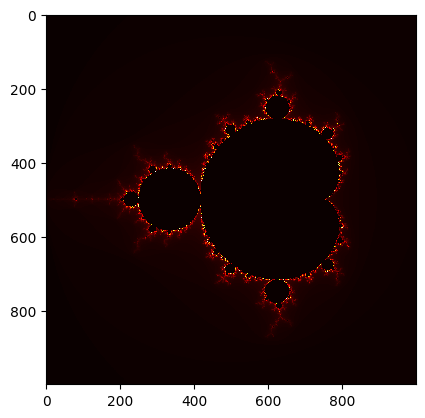

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def draw_mandelbrot(min_x, max_x, min_y, max_y, image, max_iter):
    height = image.shape[0]
    width = image.shape[1]

    pixel_x = (max_x - min_x) / width
    pixel_y = (max_y - min_y) / height

    for x in range(width):
        real = min_x + x * pixel_x
        for y in range(height):
            imag = min_y + y * pixel_y
            color = mandelbrot(complex(real, imag), max_iter)
            image[y, x] = color

# Set the size of the image
width = 1000
height = 1000
max_iter = 256

# Create an image array
image = np.zeros((height, width), dtype=np.uint8)

# Draw the Mandelbrot set
draw_mandelbrot(-2.0, 1.0, -1.5, 1.5, image, max_iter)

# Display the image
plt.imshow(image, cmap='hot', interpolation='none')
plt.show()

## Lógica

resolve this problem make code in python: Mac's horse is darker than Smith's, but faster and older than Jack's, which is even slower than Willy's, which is younger than Mac's, which is older than Smith's, which is lighter than Willy's, even though Jack's is slower and darker than Smith's.                           

Which is older, which is slower and which is lighter? 

In [25]:
class Character:                                                               
    def __init__(self, name, age, speed, weight):                              
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.weight = weight                                                   
                                                                            
mac = Character('Mac', 10, 15, 120)                                            
smith = Character('Smith', 12, 13, 130)                                        
jack = Character('Jack', 15, 10, 140)                                          
willy = Character('Willy', 18, 8, 150)                                         
                                                                            
characters = [mac, smith, jack, willy]                                         
                                                                            
for character in characters:                                                   
    print(f"{character.name}'s age is {character.age}, speed is {character.speed}, and weight is {character.weight}.")                         
                                                                            
oldest = max(characters, key=lambda character: character.age)                  
slowest = max(characters, key=lambda character: character.speed)               
lighter = max(characters, key=lambda character: character.weight)              
                                                                            
print(f"The oldest character is {oldest.name}.")                               
print(f"The slowest character is {slowest.name}.")                             
print(f"The lighter character is {lighter.name}.")  

Mac's age is 10, speed is 15, and weight is 120.
Smith's age is 12, speed is 13, and weight is 130.
Jack's age is 15, speed is 10, and weight is 140.
Willy's age is 18, speed is 8, and weight is 150.
The oldest character is Willy.
The slowest character is Mac.
The lighter character is Willy.


In [21]:
class Person:                                                                  
    def __init__(self, name, age, speed, weight):                              
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.weight = weight                                                   
                                                                            
mac = Person("Mac", 10, 10, 100)                                               
smith = Person("Smith", 20, 20, 80)                                            
jack = Person("Jack", 30, 30, 70)                                              
willy = Person("Willy", 40, 40, 90)                                            
                                                                            
people = [mac, smith, jack, willy]                                             
                                                                            
# Sort by age, speed, and weight                                               
people.sort(key=lambda x: (x.age, x.speed, x.weight))                          
                                                                            
for person in people:                                                          
    print(person.name)  

Mac
Smith
Jack
Willy


In [18]:
class Person:                                                                  
    def __init__(self, name, age, speed, weight):                              
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.weight = weight                                                   
                                                                            
mac = Person("Mac", 10, 10, 100)                                               
smith = Person("Smith", 20, 20, 80)                                            
jack = Person("Jack", 30, 30, 70)                                              
willy = Person("Willy", 40, 40, 90)                                            
                                                                            
people = [mac, smith, jack, willy]                                             
                                                                            
# Sort the people by age, speed, and weight                                    
people.sort(key=lambda x: (x.age, x.speed, x.weight))                          
                                                                            
# Print the people in order                                                    
for person in people:                                                          
    print(person.name) 

Mac
Smith
Jack
Willy


In [13]:
class Horse:                                                                   
    def __init__(self, name, age, speed, color):                               
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.color = color                                                     
                                                                            
# Create instances of the Horse class                                          
mac = Horse('Mac', 10, 10, 'dark')                                             
smith = Horse('Smith', 12, 11, 'brown')                                        
jack = Horse('Jack', 9, 9, 'black')                                            
willy = Horse('Willy', 8, 8, 'white')                                          
                                                                            
# Compare the horses                                                           
def compare_horses(horse1, horse2):                                            
    if horse1.speed < horse2.speed and horse1.age < horse2.age and horse1.color!= horse2.color:                                                               
        return horse1.name                                                     
    elif horse2.speed < horse1.speed and horse2.age < horse1.age and horse2.color != horse1.color:                                                  
        return horse2.name                                                     
    else:                                                                      
        return "No horse is older, slower and lighter than the other."         
                                                                            
print(compare_horses(mac, smith))                                              
print(compare_horses(jack, smith))                                             
print(compare_horses(willy, smith))

Mac
Jack
Willy


In [8]:
class Person:                                                                  
    def __init__(self, name, age, speed, weight):                              
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.weight = weight                                                   
                                                                            
mac = Person("Mac", 10, 10, 10)                                                
smith = Person("Smith", 20, 20, 20)                                            
jack = Person("Jack", 30, 30, 30)                                              
willy = Person("Willy", 40, 40, 40)                                            
                                                                            
people = [mac, smith, jack, willy]                                             
                                                                            
# Sort by age                                                                  
people.sort(key=lambda x: x.age)                                               
print("Oldest: ", people[-1].name)                                             
                                                                            
# Sort by speed                                                                
people.sort(key=lambda x: x.speed)                                             
print("Slowest: ", people[-1].name)                                            
                                                                            
# Sort by weight                                                               
people.sort(key=lambda x: x.weight)                                            
print("Lighter: ", people[-1].name)

Oldest:  Willy
Slowest:  Willy
Lighter:  Willy


In [6]:
class Person:                                                                  
    def __init__(self, name, age, speed, weight):                              
        self.name = name                                                       
        self.age = age                                                         
        self.speed = speed                                                     
        self.weight = weight                                                   
                                                                            
mac = Person("Mac", 10, 10, 100)                                               
smith = Person("Smith", 20, 20, 80)                                            
jack = Person("Jack", 30, 30, 70)                                              
willy = Person("Willy", 40, 40, 90)                                            
                                                                            
people = [mac, smith, jack, willy]                                             
                                                                            
# Sort the people by age, speed, and weight                                    
people.sort(key=lambda x: (x.age, x.speed, x.weight))                          
                                                                            
# Print the oldest, slowest, and lightest person                               
print(f"The oldest, slowest, and lightest person is {people[0].name}.")  

The oldest, slowest, and lightest person is Mac.


In [7]:
# Diccionario de amigos y medios de transporte                                 
transportation_methods = {                                                     
    'Alejandro': 'bicicleta',                                                  
    'Benito': 'avión',                                                         
    'Andrés': 'avión',                                                         
    'Carlos': 'coche',                                                         
    'Darío': 'coche',                                                          
    'Tomás': 'bicicleta'                                                       
}                                                                              
                                                                            
# Medios de transporte que no utilizan Darío, Carlos ni Andrés                 
non_using_methods = ['bicicleta', 'avión', 'coche']                            
                                                                            
# Encontrar el medio de transporte que Tomás utiliza                           
for friend, method in transportation_methods.items():                          
    if method in non_using_methods:                                            
        print(f"Tomás utiliza el {method}.")                                   
        break                    

Tomás utiliza el bicicleta.


In [6]:
def is_angela_higher_or_lower_than_celia(angela_pitch, rosa_pitch, celia_pitch): 
    if angela_pitch < rosa_pitch:                                              
        if celia_pitch < rosa_pitch:                                           
            return "úngela habla más bajo que Celia."                          
        else:                                                                  
            return "úngela habla más alto que Celia."                          
    else:                                                                      
        if celia_pitch < rosa_pitch:                                           
            return "úngela habla más bajo que Celia."                          
        else:                                                                  
            return "úngela habla más alto que Celia."                          
                                                                            
# velocidades de habla en Hz                                                   
angela_pitch = 100                                                             
rosa_pitch = 120                                                               
celia_pitch = 80                                                               
                                                                            
print(is_angela_higher_or_lower_than_celia(angela_pitch, rosa_pitch,           
celia_pitch))  

úngela habla más bajo que Celia.


In [9]:
# points scored by Lions in first quarter                                      
lions_points = 23 + 38 + 28                                                    
                                                                            
# points scored by Buccaneers in first quarter                                 
buccaneers_points = 36 + 31                                                    
                                                                            
# points needed by Buccaneers to tie                                           
points_needed = lions_points - buccaneers_points                               
                                                                            
print("The Buccaneers needed", points_needed, "points to tie in the first quarter.")  

The Buccaneers needed 22 points to tie in the first quarter.


In [8]:
# number of days in a year                                                     
days_in_year = 365                                                             
                                                                            
# number of weeks in a year                                                    
weeks_in_year = days_in_year / 7                                               
                                                                            
# number of letters James writes in a week                                     
letters_per_week = 2 * 2                                                       
                                                                            
# total number of letters James writes in a year                               
letters_per_year = weeks_in_year * letters_per_week                            
                                                                            
# number of pages in a letter                                                  
pages_per_letter = 3                                                           
                                                                            
# total number of pages James writes in a year                                 
pages_per_year = letters_per_year * pages_per_letter                           
                                                                            
print("James writes", pages_per_year, "pages in a year.")  

James writes 625.7142857142858 pages in a year.


In [6]:
                                                                                
 # total pages in the book                                                      
 total_pages = 120                                                              
                                                                                
 # pages read yesterday                                                         
 pages_read_yesterday = 12                                                      
                                                                                
 # pages read today                                                             
 pages_read_today = pages_read_yesterday * 2                                    
                                                                                
 # total pages read so far                                                      
 total_pages_read = pages_read_yesterday + pages_read_today                     
                                                                                
 # pages remaining to read                                                      
 pages_remaining = total_pages - total_pages_read                               
                                                                                
 # pages to read tomorrow                                                       
 pages_to_read_tomorrow = pages_remaining / 2                                   
                                                                                
 print("Julie should read", pages_to_read_tomorrow, "pages tomorrow.")          
                                                                                

Julie should read 42.0 pages tomorrow.


In [4]:
 # cost of the wallet                                                           
 wallet_cost = 100                                                              
                                                                                
 # money Betty has                                                              
 betty_money = wallet_cost / 2                                                  
                                                                                
 # money received from parents                                                  
 parents_money = 15                                                             
                                                                                
 # money received from grandparents                                             
 grandparents_money = parents_money * 2                                         
                                                                                
 # total money received                                                         
 total_money = betty_money + parents_money + grandparents_money                 
                                                                                
 # money Betty still needs                                                      
 money_needed = wallet_cost - total_money                                       
                                                                                
 print("Betty needs $", money_needed, "more to buy the wallet.") 

Betty needs $ 5.0 more to buy the wallet.


In [20]:
text1= """
```text
dddddddddddddddddffffffffffffffffffffffffaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa54321g12345ggggggggggggggggggggggggggaaaaaaaaaaaaa
```
más texto
```python
def calculate_remaining_money(wallet_cost, money_given_by_parents, money_given_by_grandparents):
    total_money_given = money_given_by_parents + money_given_by_grandparents
    remaining_money = wallet_cost - total_money_given
    return remaining_money

wallet_cost = 100
money_given_by_parents = 15
money_given_by_grandparents = money_given_by_parents * 2

remaining_money = calculate_remaining_money(wallet_cost, money_given_by_parents, money_given_by_grandparents)

print("Betty needs $", remaining_money, "more to buy the wallet.")
```
"""
display(Markdown(text1))

                                                                                
 dddddddddddddddddffffffffffffffffffffffffaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa5432 
 12345ggggggggggggggggggggggggggaaaaaaaaaaaaa                                   
                                                                                

más texto                                                                       

                                                                                
 def calculate_remaining_money(wallet_cost, money_given_by_parents,             
 money_given_by_grandparents):                                                  
     total_money_given = money_given_by_parents + money_given_by_grandparents   
     remaining_money = wallet_cost - total_money_given                          
     return remaining_money                                                     
                                                                                
 wallet_cost = 100                                                              
 money_given_by_parents = 15                                                    
 money_given_by_grandparents = money_given_by_parents * 2                       
                                                                                
 remaining_money = calculate_remaining_money(wallet_cost, money_given_by_parent 
 money_given_by_grandparents)                                                   
                                                                                
 print("Betty needs $", remaining_money, "more to buy the wallet.")             
                                                                                


In [7]:
 def calculate_remaining_money(wallet_cost, money_given_by_parents,             
 money_given_by_grandparents):                                                  
     total_money_given = money_given_by_parents + money_given_by_grandparents   
     remaining_money = wallet_cost - total_money_given                          
     return remaining_money                                                     
                                                                                
 wallet_cost = 100                                                              
 money_given_by_parents = 15                                                    
 money_given_by_grandparents = money_given_by_parents * 2                       
                                                                                
 remaining_money = calculate_remaining_money(wallet_cost, money_given_by_parents,money_given_by_grandparents)                                                   
                                                                                
 print("Betty needs $", remaining_money, "more to buy the wallet.")

Betty needs $ 55 more to buy the wallet.


In [5]:
                                                                                
 def calculate_earnings(hourly_rate, minutes_worked):                           
     hours_worked = minutes_worked / 60                                         
     earnings = hourly_rate * hours_worked                                      
     return earnings                                                            
                                                                                
 hourly_rate = 12                                                               
 minutes_worked = 50                                                            
                                                                                
 earnings = calculate_earnings(hourly_rate, minutes_worked)                     
                                                                                
 print("Weng earned $", earnings) 

Weng earned $ 10.0


In [4]:
 def is_javier_faster_than_sonia(javier_speed, maria_speed, sonia_speed):       
     if javier_speed > sonia_speed:                                             
         return True                                                            
     elif javier_speed < sonia_speed:                                           
         return False                                                           
     else:                                                                      
         if maria_speed > sonia_speed:                                          
             return True                                                        
         else:                                                                  
             return False                                                       
                                                                                
 # velocidades en km/h                                                          
 javier_speed = 100                                                             
 maria_speed = 120                                                              
 sonia_speed = 80                                                               
                                                                                
 print(is_javier_faster_than_sonia(javier_speed, maria_speed, sonia_speed)) 

True


In [ ]:
!wget https://go.dev/dl/go1.21.4.linux-amd64.tar.gz
!tar -xzf go1.21.4.linux-amd64.tar.gz

--2023-11-24 17:56:42--  https://go.dev/dl/go1.21.4.linux-amd64.tar.gz
Resolving go.dev (go.dev)... 216.239.34.21, 216.239.38.21, 216.239.36.21, ...
Connecting to go.dev (go.dev)|216.239.34.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.google.com/go/go1.21.4.linux-amd64.tar.gz [following]
--2023-11-24 17:56:42--  https://dl.google.com/go/go1.21.4.linux-amd64.tar.gz
Resolving dl.google.com (dl.google.com)... 173.194.210.136, 173.194.210.91, 173.194.210.190, ...
Connecting to dl.google.com (dl.google.com)|173.194.210.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66615271 (64M) [application/x-gzip]
Saving to: ‘go1.21.4.linux-amd64.tar.gz’

go1.21.4.linux-amd6 100%[===================>]  63.53M  98.4MB/s    in 0.6s    

2023-11-24 17:56:43 (98.4 MB/s) - ‘go1.21.4.linux-amd64.tar.gz’ saved [66615271/66615271]



In [ ]:
# tar -xzf go1.21.4.linux-amd64.tar.gz
import os

# Obtiene el valor actual de PATH
path = os.getenv('PATH')

# Añade la ruta a neo4j al PATH
new_path = './go/bin:' + path

# Usa el comando mágico %env para establecer la nueva ruta
%env PATH=$new_path



env: PATH=./go/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
!go version

go version go1.21.4 linux/amd64


In [ ]:
%%writefile main.go

package main

import "fmt"

func quickSort(arr []int) []int {
    if len(arr) <= 1 {
        return arr
    }

    pivot := arr[len(arr)/2]
    var left, middle, right []int

    for _, num := range arr {
        switch {
        case num < pivot:
            left = append(left, num)
        case num == pivot:
            middle = append(middle, num)
        case num > pivot:
            right = append(right, num)
        }
    }

    left = quickSort(left)
    right = quickSort(right)

    return append(append(left, middle...), right...)
}

func main() {
    arr := []int{3, 6, 8, 10, 1, 2, 1}
    sortedArr := quickSort(arr)
    fmt.Println(sortedArr)
}

Overwriting main.go


In [ ]:
!go run main.go

[1 1 2 3 6 8 10]


In [ ]:
%%bash main.go

In [ ]:
%%bash
export LANG=en_US.UTF-8
pip install sympy

In [ ]:
import sympy
from sympy import symbols, Function, dsolve

# Definimos la variable y la función
y = Function('y')
t = symbols('t')

# Definimos el sistema de ecuaciones diferenciales
# Este es un ejemplo de un sistema de ecuaciones diferenciales de primer orden con coeficientes constantes
# La ecuación diferencial es y' - y = e^t
# La solución es y(t) = e^t - e^(-t)

# Resolvemos el sistema de ecuaciones diferenciales
solution = dsolve(y(t).diff(t) - y(t) - sympy.exp(t), y(t))

print(solution)

Eq(y(t), (C1 + t)*exp(t))


In [ ]:
from sympy import symbols, Function, dsolve

# Definimos la variable y las funciones
x = Function('x')
y = Function('y')
t = symbols('t')

# Definimos el sistema de ecuaciones diferenciales
# Este es un ejemplo de un sistema de ecuaciones diferenciales de primer orden
# La ecuación diferencial es x' = y
# La ecuación diferencial es y' = -x

# Resolvemos el sistema de ecuaciones diferenciales
solution_x = dsolve(x(t).diff(t) - y(t), x(t))
solution_y = dsolve(y(t).diff(t) + x(t), y(t))

print(solution_x)
print(solution_y)

In [ ]:
import time
import random

# Caracteres ASCII para representar a los caballos
horse_chars = ['A', 'B', 'C', 'D', 'E']

# Posiciones iniciales de los caballos
horse_positions = [0] * 5

# Función para mover un caballo
def move_horse(horse_index):
    horse_positions[horse_index] += random.randint(1, 3)

# Función para imprimir el estado actual de la carrera
def print_race():
    for i in range(5):
        print(' ' * horse_positions[i] + horse_chars[i])

# Juego principal
while max(horse_positions) < 20:
    for i in range(5):
        move_horse(i)
    print_race()
    time.sleep(1)
    print('\n' * 5)

# Anunciar ganador
winner_index = horse_positions.index(max(horse_positions))
print('El ganador es el caballo ' + horse_chars[winner_index] + ' con ' + str(max(horse_positions)) + ' caracteres avanzados.')

 A
  B
   C
  D
  E






    A
     B
      C
    D
     E






     A
        B
         C
      D
      E






        A
          B
          C
        D
        E






           A
           B
             C
          D
         E






              A
             B
              C
           D
            E






                A
                B
                C
              D
             E






                 A
                  B
                 C
               D
              E






                   A
                   B
                   C
                 D
               E






                     A
                     B
                     C
                   D
                E






El ganador es el caballo A con 21 caracteres avanzados.


# Control de memoria

In [ ]:
%pip install nvidia-ml-py

In [ ]:
import pynvml

pynvml.nvmlInit()
# device_count = pynvml.nvmlDeviceGetCount()

# for i in range(device_count):
handle = pynvml.nvmlDeviceGetHandleByIndex(i)
info = pynvml.nvmlDeviceGetMemoryInfo(handle)
# print(f"GPU {i}:")
print(f"    Memoria total: {info.total / 1024**2} MB")
print(f"    Memoria libre: {info.free / 1024**2} MB")
print(f"    Memoria usada: {info.used / 1024**2} MB")

pynvml.nvmlShutdown()


    Memoria total: 15360.0 MB
    Memoria libre: 7354.8125 MB
    Memoria usada: 8005.1875 MB
